In [1]:
 from google.colab import drive # load data from google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import zipfile # extract zip file
with zipfile.ZipFile("gdrive/My Drive/loan.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

# import packages, use pandas to read csv file

In [3]:
import numpy as np
import pandas as pd
import os
import gc
df = pd.read_csv('loan.csv', na_values=['#NAME?']) # '#NAME?' in the datafile will be converted to NaN

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# let's see shape of data. We have 887379 rows with 74 columns

In [4]:
df.shape

(887379, 74)

# take a brief look at first 5 rows of data with all columns

In [5]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# check information of data, from below infor, we can see that there are some missing data in few columns compared to total number of id

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

# let see what the columns are

In [7]:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

#  Data Visualization Before Data Preprocessing

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline

#  the distribuition of the LOAN AMOUNT

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



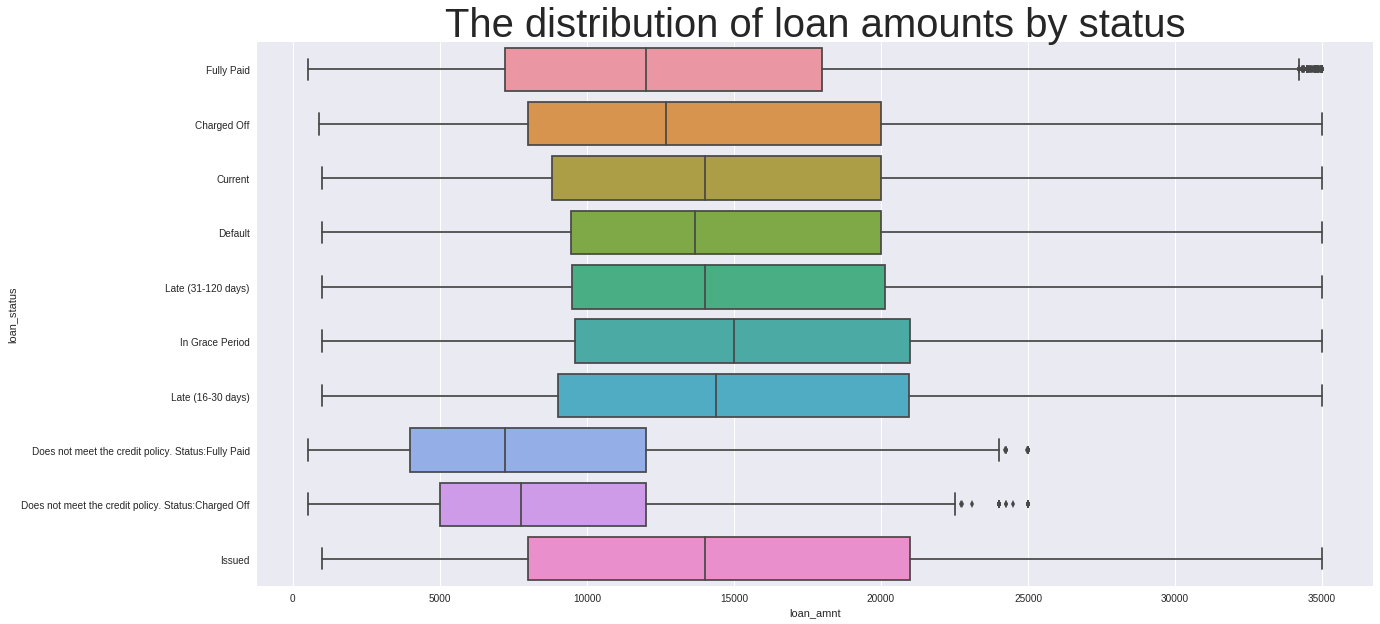

In [9]:
plt.subplots(figsize=(20,10))
plt.title("The distribution of loan amounts by status").set_size(40)
sns.boxplot(x="loan_amnt", y="loan_status", data=df)

# Another interesting value to a Loan is the interest rate. Let's look this attribute

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



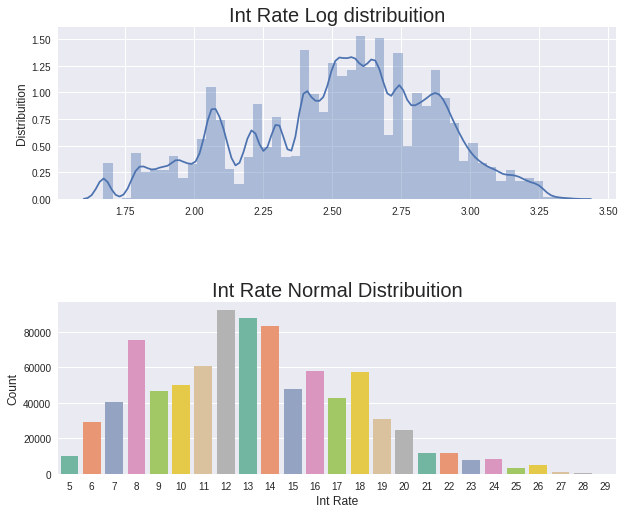

In [10]:
df['int_round'] = df['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(df["int_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=df, 
                   palette="Set2")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Int Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

# Loan Status Distribuition

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



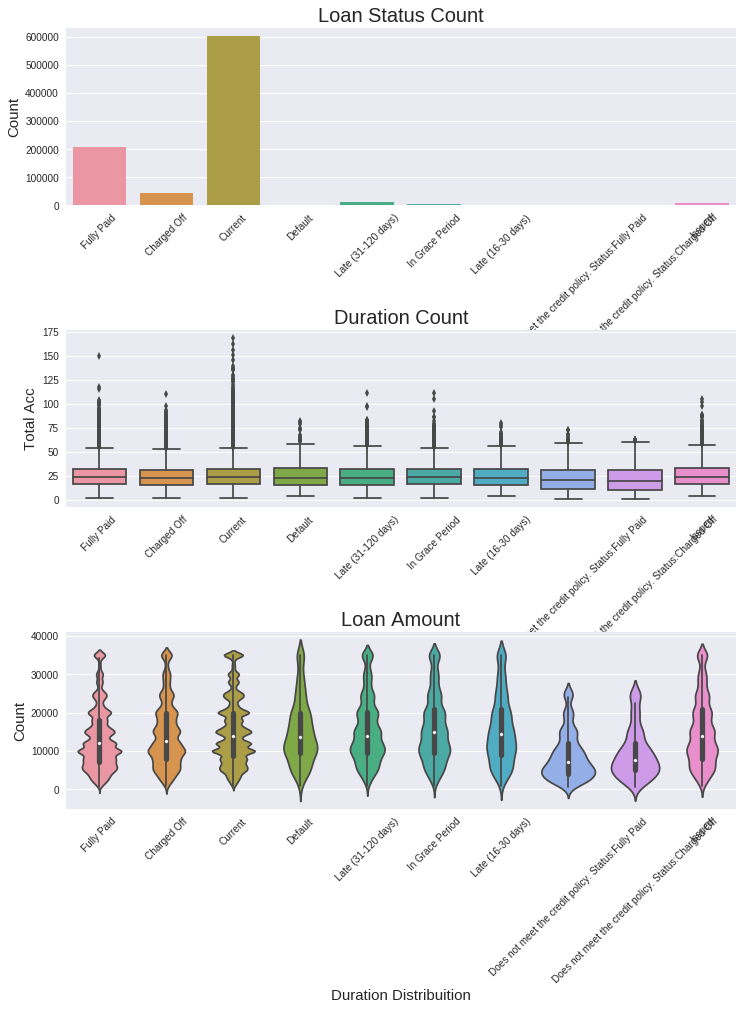

In [11]:
print(df.loan_status.value_counts())

plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="total_acc", data=df)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Total Acc", fontsize=15)
g1.set_title("Duration Count", fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=df)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Duration Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Loan Amount", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

#  issuance of loans by years

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Text(0,0.5,'Average loan amount issued')

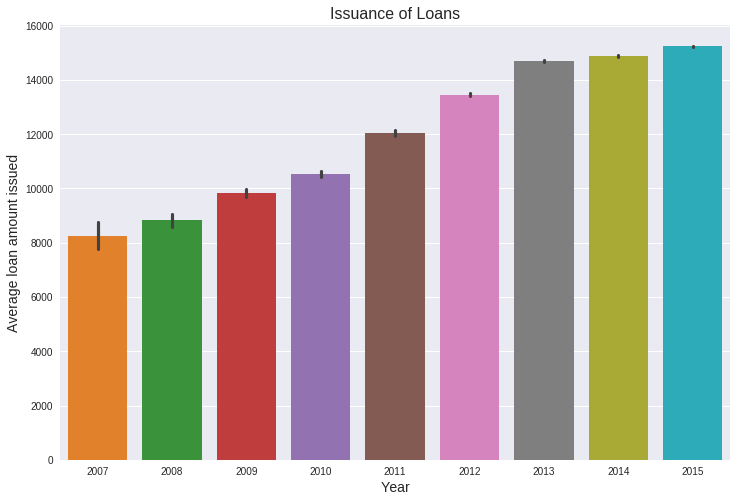

In [12]:
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str
plt.figure(figsize=(12,8))
sns.barplot('issue_year', 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

# visualize how many loans were issued by credit score

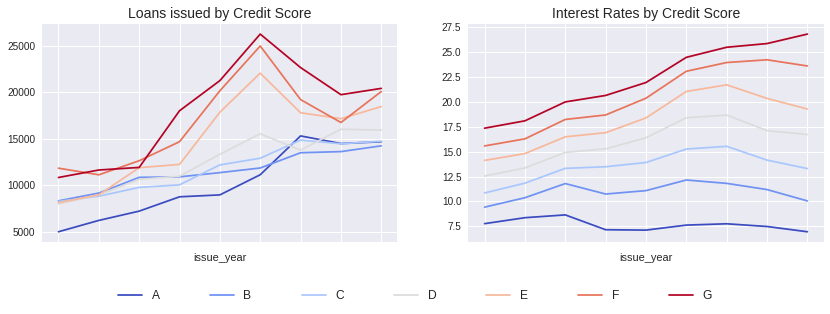

In [13]:
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['issue_year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['issue_year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

In [0]:
# drop the columns we created for data visualiztion

In [0]:
df.drop(['int_round','issue_year','issue_month'], axis=1, inplace=True)

# Let us find out which columns have positive correlation with each loan status

## First, we convert some critical category value, such as loan_status, term, grade, home_ownership, into new columns and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

## Second, we look up the new data frame after applying one-hot encoding. 98 coloumns are in the new data we created.

In [16]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['loan_status',"term","grade",'home_ownership'], prefix = ['loan_status',"term","grade",'home_ownership'])

print(df_onehot.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0  1077501    1296599     5000.0       5000.0           4975.0     10.65   
1  1077430    1314167     2500.0       2500.0           2500.0     15.27   
2  1077175    1313524     2400.0       2400.0           2400.0     15.96   
3  1076863    1277178    10000.0      10000.0          10000.0     13.49   
4  1075358    1311748     3000.0       3000.0           3000.0     12.69   

   installment sub_grade                 emp_title emp_length  \
0       162.87        B2                       NaN  10+ years   
1        59.83        C4                     Ryder   < 1 year   
2        84.33        C5                       NaN  10+ years   
3       339.31        C1       AIR RESOURCES BOARD  10+ years   
4        67.79        B5  University Medical Group     1 year   

          ...          grade_D grade_E grade_F grade_G home_ownership_ANY  \
0         ...                0       0       0       0                  0  

## Third, we use df_correlations dataframe to analyze our correlations.

In [17]:
df_correlations = df_onehot.corr()

trace = go.Heatmap(z=df_correlations.values,
                   x=df_correlations.columns,
                   y=df_correlations.columns,
                  colorscale=[[0.0, 'rgb(165,0,38)'], 
                              [0.1111111111111111, 'rgb(215,48,39)'], 
                              [0.2222222222222222, 'rgb(244,109,67)'], 
                              [0.3333333333333333, 'rgb(253,174,97)'], 
                              [0.4444444444444444, 'rgb(254,224,144)'], 
                              [0.5555555555555556, 'rgb(224,243,248)'], 
                              [0.6666666666666666, 'rgb(171,217,233)'], 
                              [0.7777777777777778, 'rgb(116,173,209)'], 
                              [0.8888888888888888, 'rgb(69,117,180)'], 
                              [1.0, 'rgb(49,54,149)']],
            colorbar = dict(
            title = 'Level of Correlation',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-0.52,0.2,0.95],
            ticktext = ['Negative Correlation','Low Correlation','Positive Correlation'],
            ticks = 'outside'
        )
                  )


layout = {"title": "Correlation Heatmap"}
data=[trace]

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

## Check which top 15 coloumns have positive correlation with the four most frequent loan status - loan_status_Current, loan_status_Charged Off, loan_status_Fully Paid and loan_status_Late (31-120 days) in the data respectively.

In [18]:
df_onehot.corr()["loan_status_Current"].sort_values(ascending=False).head(15)

loan_status_Current    1.000000
out_prncp              0.573850
out_prncp_inv          0.573846
member_id              0.522150
id                     0.520245
term_ 60 months        0.096690
funded_amnt_inv        0.091277
funded_amnt            0.085803
loan_amnt              0.083737
open_acc               0.067341
dti                    0.052754
pub_rec                0.051533
revol_bal              0.046914
installment            0.042261
total_rev_hi_lim       0.038837
Name: loan_status_Current, dtype: float64

In [19]:
df_onehot.corr()["loan_status_Charged Off"].sort_values(ascending=False).head(15) 

loan_status_Charged Off    1.000000
recoveries                 0.478023
collection_recovery_fee    0.326014
int_rate                   0.146484
total_rec_late_fee         0.117012
inq_last_6mths             0.067095
mths_since_last_record     0.061761
grade_F                    0.056652
grade_E                    0.050183
grade_D                    0.047433
total_rec_int              0.043716
revol_util                 0.042874
grade_G                    0.033460
home_ownership_RENT        0.032946
term_ 60 months            0.028936
Name: loan_status_Charged Off, dtype: float64

In [20]:
df_onehot.corr()["loan_status_Fully Paid"].sort_values(ascending=False).head(15)

loan_status_Fully Paid    1.000000
last_pymnt_amnt           0.646382
total_rec_prncp           0.628001
total_pymnt               0.535744
total_pymnt_inv           0.532689
term_ 36 months           0.128799
mths_since_last_record    0.085979
inq_last_6mths            0.071592
grade_B                   0.040972
total_rec_int             0.038944
grade_A                   0.035584
mths_since_last_delinq    0.031044
open_acc_6m               0.019010
inq_last_12m              0.018561
open_rv_24m               0.018153
Name: loan_status_Fully Paid, dtype: float64

In [21]:
df_onehot.corr()["loan_status_Late (31-120 days)"].sort_values(ascending=False).head(15)

loan_status_Late (31-120 days)    1.000000
total_rec_late_fee                0.098913
int_rate                          0.072385
out_prncp_inv                     0.044519
out_prncp                         0.044515
total_rec_int                     0.040182
grade_E                           0.034030
grade_F                           0.029141
grade_D                           0.029099
term_ 60 months                   0.023546
grade_G                           0.022065
inq_last_6mths                    0.018307
revol_util                        0.016069
home_ownership_RENT               0.014344
installment                       0.014249
Name: loan_status_Late (31-120 days), dtype: float64

# Feature engineering

In [0]:
%reset -sf

In [23]:
import numpy as np
import pandas as pd
import os
import gc
gc.collect()

308

In [0]:
#del df, df_onehot
gc.collect()
df = pd.read_csv('loan.csv', na_values=['#NAME?'], low_memory=False) # '#NAME?' in the datafile will be converted to NaN

# for our target value, check the count of different statuses

In [25]:
df["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

# let us check the data for missing values

In [26]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
print(missing_values_count)

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

# define a function for calculating the number of missing values and percentage compared to whole data set

In [0]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.")
        return mis_val_table_ren_columns

# run the function to list the missing values with percentages

In [28]:
# Missing values statistics
miss_values = null_values(df)
miss_values.head(50)

Dataframe has 74 columns.
There are 40 columns with missing values.


,Missing Values,% of Total Values
dti_joint,886870,99.9
annual_inc_joint,886868,99.9
verification_status_joint,886868,99.9
il_util,868762,97.9
mths_since_rcnt_il,866569,97.7
total_cu_tl,866007,97.6
inq_fi,866007,97.6
all_util,866007,97.6
max_bal_bc,866007,97.6
open_rv_24m,866007,97.6


# first, drop the columns that might not be correlated with the target value

In [0]:
# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

# next, drop the columns with too many missing values, set the cut point around 75%

In [0]:
df.drop(['dti_joint','annual_inc_joint','verification_status_joint','il_util','mths_since_rcnt_il','total_cu_tl',
         'inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','total_bal_il','open_il_24m','total_bal_il',
         'open_il_24m','open_il_6m','open_acc_6m','open_il_12m','inq_last_12m','mths_since_last_record','mths_since_last_major_derog'],axis=1, inplace=True)

# check again missing values, fill up empty

In [31]:
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 48 columns.
There are 18 columns with missing values.


,Missing Values,% of Total Values
mths_since_last_delinq,454312,51.2
next_pymnt_d,252971,28.5
total_rev_hi_lim,70276,7.9
tot_cur_bal,70276,7.9
tot_coll_amt,70276,7.9
emp_length,44825,5.1
last_pymnt_d,17659,2.0
revol_util,502,0.1
collections_12_mths_ex_med,145,0.0
last_credit_pull_d,53,0.0


# lets fill up the column with most missing values after last two drops

In [0]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())

#  determine what is bad loan, what is not

In [0]:

# Determining the loans that are bad from loan_status column

#bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
#            "Late (16-30 days)", "Late (31-120 days)"]




In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df["loan_status"])
df['loan_status']= integer_encoded

In [34]:
unique, counts = np.unique(integer_encoded, return_counts=True)
print('Unique values:\n', np.asarray((unique, counts)).T)

Unique values:
 [[     0  45248]
 [     1 601779]
 [     2   1219]
 [     3    761]
 [     4   1988]
 [     5 207723]
 [     6   6253]
 [     7   8460]
 [     8   2357]
 [     9  11591]]


In [35]:
a=label_encoder.inverse_transform(unique)
a

array(['Charged Off', 'Current', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)'], dtype=object)

# fill up NaN values

In [0]:
# maybe move it before define y
df['issue_d']= pd.to_datetime(df['issue_d']).apply(lambda x: int(x.strftime('%Y')))
df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'].fillna('2016-01-01')).apply(lambda x: int(x.strftime('%m')))
df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'].fillna("2016-01-01")).apply(lambda x: int(x.strftime('%m')))
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'].fillna('2007-08-01')).apply(lambda x: int(x.strftime('%m')))
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'].fillna(value = '2016-02-01')).apply(lambda x:int(x.strftime("%Y")))

# import sklearn to encode the variables

In [0]:
from sklearn import preprocessing

In [38]:
count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


# get dummies for all columns

In [39]:
df = pd.get_dummies(df)
print(df.shape)

(887379, 168)


In [40]:
unique, counts = np.unique(df['loan_status'], return_counts=True)
print('Unique values:\n', np.asarray((unique, counts)).T) #check unique values

Unique values:
 [[     0  45248]
 [     1 601779]
 [     2   1219]
 [     3    761]
 [     4   1988]
 [     5 207723]
 [     6   6253]
 [     7   8460]
 [     8   2357]
 [     9  11591]]


# drop the NaN values, make sure there is no na in training and test dataset

In [0]:
#df.dropna(inplace=True)

In [42]:
miss_values = null_values(df[(df["loan_status"]==3) | (df["loan_status"]==4)]) # loan_status 3,4 depend on these 3 columns, we need to keep them for tree boosting algorithms
miss_values.head(20)
#tot_coll_amt,tot_cur_bal, total_rev_hi_lim

Dataframe has 168 columns.
There are 12 columns with missing values.


,Missing Values,% of Total Values
tot_coll_amt,2749,100.0
tot_cur_bal,2749,100.0
total_rev_hi_lim,2749,100.0
collections_12_mths_ex_med,89,3.2
revol_util,40,1.5
delinq_2yrs,29,1.1
inq_last_6mths,29,1.1
open_acc,29,1.1
pub_rec,29,1.1
total_acc,29,1.1


In [43]:
no_three_column=df.drop(['tot_coll_amt','tot_cur_bal', 'total_rev_hi_lim'],1)
missing=null_values(no_three_column)
missing.head(20)

Dataframe has 165 columns.
There are 9 columns with missing values.


,Missing Values,% of Total Values
revol_util,502,0.1
collections_12_mths_ex_med,145,0.0
delinq_2yrs,29,0.0
inq_last_6mths,29,0.0
open_acc,29,0.0
pub_rec,29,0.0
total_acc,29,0.0
acc_now_delinq,29,0.0
annual_inc,4,0.0


In [0]:
no_three_column.dropna(inplace=True)

In [45]:
no_three_column.shape

(886764, 165)

In [0]:
#df[(df["loan_status"]==3) | (df["loan_status"]==4)].dropna(inplace=True)

In [0]:
df2=df.loc[(df["loan_status"]!=3) | (df["loan_status"]!=4)].dropna()

In [0]:
df=pd.concat([df2,df[(df["loan_status"]==3) | (df["loan_status"]==4)]],0)

In [49]:
null_values(df) # these missing values are important for decision trees since they are only related to loan_status=3,4

Dataframe has 168 columns.
There are 12 columns with missing values.


,Missing Values,% of Total Values
tot_coll_amt,2749,0.3
tot_cur_bal,2749,0.3
total_rev_hi_lim,2749,0.3
collections_12_mths_ex_med,89,0.0
revol_util,40,0.0
delinq_2yrs,29,0.0
inq_last_6mths,29,0.0
open_acc,29,0.0
pub_rec,29,0.0
total_acc,29,0.0


In [50]:
df.shape

(819471, 168)

# use head() to check what the data looks like now, as we expected

In [51]:
no_three_column.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,issue_d,loan_status,pymnt_plan,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,5000.0,4975.0,0,10.65,162.87,24000.0,2011,5,0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,30000.0,2011,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,0,15.96,84.33,12252.0,2011,5,0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,49200.0,2011,5,0,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,80000.0,2011,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5000.0,5000.0,5000.0,0,7.90,156.46,36000.0,2011,5,0,...,0,0,0,0,0,0,0,0,0,0
6,7000.0,7000.0,7000.0,1,15.96,170.08,47004.0,2011,1,0,...,0,0,0,0,0,0,0,0,0,0
7,3000.0,3000.0,3000.0,0,18.64,109.43,48000.0,2011,5,0,...,0,0,0,0,0,0,0,0,0,0
8,5600.0,5600.0,5600.0,1,21.28,152.39,40000.0,2011,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5375.0,5375.0,5350.0,1,12.69,121.45,15000.0,2011,0,0,...,0,0,1,0,0,0,0,0,0,0


# define x and y

In [0]:
X = no_three_column.drop('loan_status',1)
y = no_three_column['loan_status']

# use sklearn to split the dataset into training and test

In [0]:
#build test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [54]:
#y_train.shape
unique, counts = np.unique(y_test, return_counts=True)
print('Unique values:\n', np.asarray((unique, counts)).T)

Unique values:
 [[     0  13559]
 [     1 180460]
 [     2    365]
 [     3    221]
 [     4    574]
 [     5  62257]
 [     6   1875]
 [     7   2537]
 [     8    707]
 [     9   3475]]


# fit the training dataset into logistic regression model

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
# log_reg_sm = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# view the accuracy, result is good (95.5% )


In [56]:
from sklearn.metrics import accuracy_score

normal_ypred = log_reg.predict(X_test)
print(accuracy_score(y_test, normal_ypred))

0.9565725670037214


# lightGBM model

In [0]:
#from sklearn.preprocessing import StandardScaler
# normalize dataset
#norm_X = StandardScaler() # initiate scaler
#X_train_norm = norm_X.fit_transform(X_train) # get normalization parameters based on train dataset 
#X_test_norm = norm_X.transform(X_test) # apply normalization to test data based on train dataset parameters

In [0]:
X = df.drop('loan_status',1)
y = df['loan_status']

In [0]:
#build test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [60]:
import gc # clean unused variables from RAM
gc.collect()

138

In [61]:
#y_train.shape
unique, counts = np.unique(y_test, return_counts=True)
print('Unique values:\n', np.asarray((unique, counts)).T)

Unique values:
 [[     0  10562]
 [     1 179385]
 [     2    360]
 [     3    228]
 [     4    596]
 [     5  46181]
 [     6   1856]
 [     7   2537]
 [     8    698]
 [     9   3439]]


In [0]:
import lightgbm as lgb

param = {'boosting_type': 'gbdt','num_leaves':35,'nthread': 4, 'num_trees':100, 'objective':'multiclass', 'metric' : 'softmax',
        'num_class': 10}


In [63]:
train_data = lgb.Dataset(X_train, y_train, silent=False) 
test_data = lgb.Dataset(X_test, y_test, silent=False) 
model = lgb.train(param, train_set = train_data, num_boost_round=20, verbose_eval=4)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:116: UserWarning:

Found `num_trees` in params. Will use it instead of argument



In [0]:
preds = model.predict(X_test, num_iteration = model.best_iteration)

In [0]:
from sklearn.metrics import accuracy_score
#predicted=np.where(preds > 0.5, 1, 0)
#preds[preds > 0.5] = 1
#preds[preds <= 0.5] = 0
#
(preds)
predictions = []

for x in preds:
    predictions.append(np.argmax(x))

In [66]:
acc_lgbm = accuracy_score(y_test,predictions)
print('Overall accuracy of Light GBM model:', acc_lgbm)

Overall accuracy of Light GBM model: 0.9654493536499053


In [67]:
np.unique(predictions)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

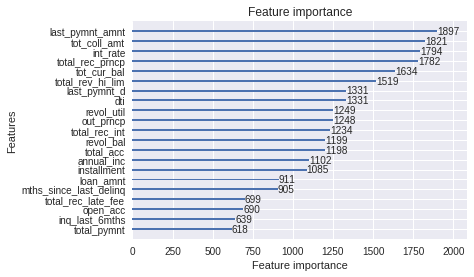

In [68]:
lgb.plot_importance(model, max_num_features=21, importance_type='split')
#tot_coll_amt,tot_cur_bal, total_rev_hi_lim

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [0]:
def conf_m(cm):
  labels = ['Charged Off', 'Current', 'Default',
         'not meet policy. Status:Charged Off',
         'not meet policy. Status:Fully Paid', 'Fully Paid',
         'In Grace Period', 'Issued', 'Late (16-30 days)',
         'Late (31-120 days)']
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
  plt.title('Confusion Matrix')
  plt.ylabel('True Class')
  plt.xlabel('Predicted Class')
  return plt.show()

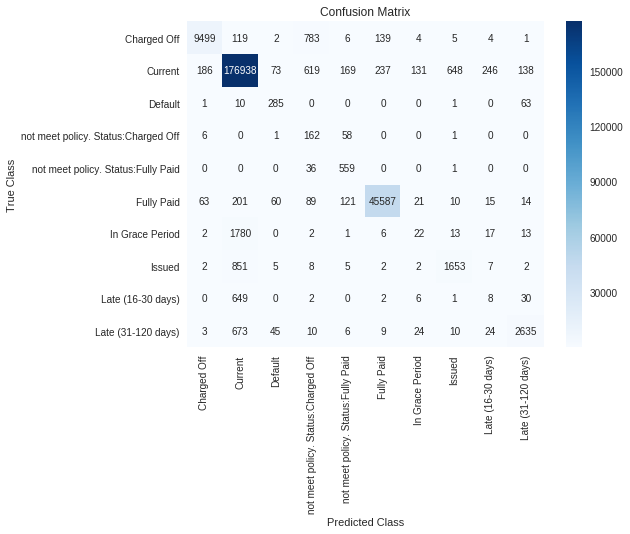

In [71]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions)
conf_m(cm)

# LightGBM Balanced data

In [72]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import OneSidedSelection
del X, y, X_train, X_test, y_train, y_test
gc.collect()

8024

In [0]:
X = no_three_column.drop('loan_status',1)
y = no_three_column['loan_status']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [0]:
oss = OneSidedSelection()
X_resampled, y_resampled = oss.fit_sample(X, y)

In [76]:
np.unique(y_resampled)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=14)

In [0]:
train_data = lgb.Dataset(X_train, y_train, silent=False) 
test_data = lgb.Dataset(X_test, y_test, silent=False) 
param = {'boosting_type': 'gbdt','num_leaves':45,'nthread': 4, 'objective':'multiclass', 'metric' : 'softmax',
        'num_class': 10}
model = lgb.train(param, train_set = train_data, verbose_eval=5, num_boost_round=40)

In [0]:
preds = model.predict(X_test, num_iteration = model.best_iteration)

In [0]:
from sklearn.metrics import accuracy_score

(preds)
predictions = []

for x in preds:
    predictions.append(np.argmax(x))

In [110]:
acc_lgbm = accuracy_score(y_test,predictions)
print('Overall accuracy of Light GBM model:', acc_lgbm)

Overall accuracy of Light GBM model: 0.9864446945909118


In [114]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99953981 0.98740878 0.27613941 0.65232975 0.86388889 0.99792584
 0.08910891 0.74960128 0.02857143 0.92837959]
recall: [0.98637602 0.99633825 0.79230769 0.86666667 0.88101983 0.99735401
 0.00959488 0.57633354 0.0166113  0.70257453]
fscore: [0.99291429 0.99185342 0.40954274 0.74437628 0.87237027 0.99763984
 0.01732435 0.65164645 0.0210084  0.79984574]
support: [ 13212 175599    130    210    353  59335    938   1631    301   1476]


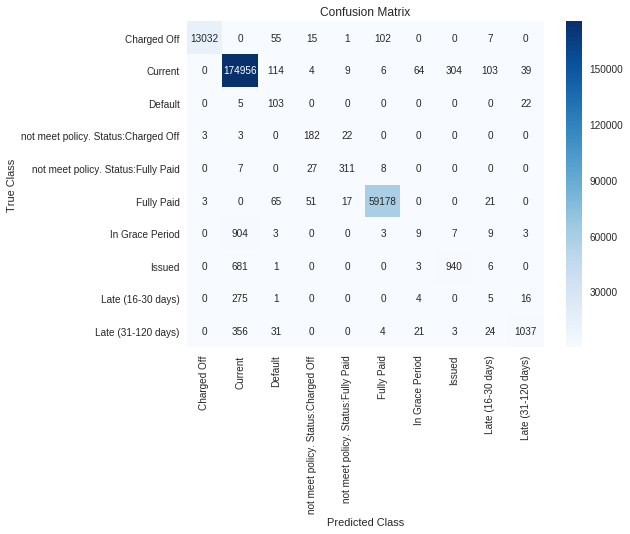

In [111]:
plt.figure()
cm = confusion_matrix(y_test, predictions)
conf_m(cm)

## XG Boost

In [0]:
# this is required for XG boost because column names containing those [] < characters can not be trained
#import re
#regex = re.compile(r"\[|\]|<", re.IGNORECASE)
#X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
#X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


In [116]:
from xgboost import XGBClassifier


model = XGBClassifier(objective='multi:softmax', nthread=-1 )
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=1, eval_metric="merror", eval_set=eval_set, verbose=True )
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-merror:0.032502
Will train until validation_0-merror hasn't improved in 1 rounds.
[1]	validation_0-merror:0.032304
[2]	validation_0-merror:0.029113
[3]	validation_0-merror:0.029236
Stopping. Best iteration:
[2]	validation_0-merror:0.029113

Accuracy: 97.08%


In [117]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.9379409  0.98208034 1.         0.97619048 0.92057762 0.94387714
 0.         0.         0.         0.9732528 ]
recall: [0.74470179 0.99997153 0.83076923 0.78095238 0.7223796  0.98921379
 0.         0.         0.         0.76422764]
fscore: [0.8302253  0.99094518 0.90756303 0.86772487 0.80952381 0.96601382
 0.         0.         0.         0.85616698]
support: [ 13212 175599    130    210    353  59335    938   1631    301   1476]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



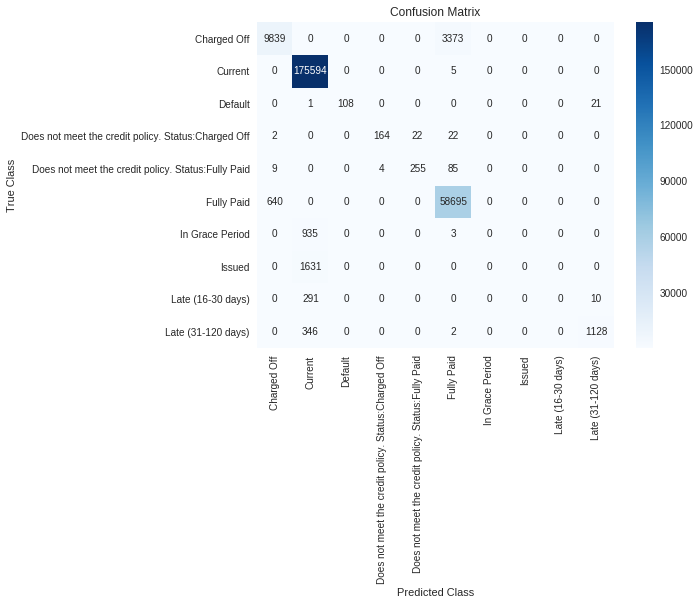

In [118]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions)
labels = ['Charged Off', 'Current', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

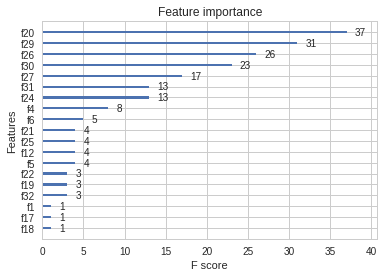

In [119]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model)
pyplot.show()

# Decision Tree & Random Forest

In [122]:
#%reset
import sklearn
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import re
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np
import gc
from imblearn.under_sampling import OneSidedSelection
gc.collect()

248

In [0]:
df = pd.read_csv('loan.csv', na_values=['#NAME?'],low_memory=False)

# define a function to allow the machine learning algorithims to work on integers instead of strings

In [0]:
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1 for x in l]

# Extract only the number from cells and convert into float number

In [125]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



# Fill in missing values

In [0]:
df['emp_length'] = df['emp_length'].fillna(df.emp_length.median())
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(df['acc_now_delinq'].median())
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(df['delinq_2yrs'].median())

# Create a new data frame and select some critical attributes by our judgement & the result from correlation to deploy in models.

In [0]:
df_ml = pd.DataFrame()
df_ml['annual_inc'] = df['annual_inc']
df_ml['delinq_2yrs'] = df['delinq_2yrs']
df_ml['dti'] = df['dti']
df_ml['emp_length'] = categorize(df['emp_length'])
df_ml['home_ownership'] = categorize(df['home_ownership'])
df_ml['installment'] = df['installment']
df_ml['int_rate'] = df['int_rate']
df_ml['loan_amnt'] = df['loan_amnt']
df_ml['loan_status'] = categorize(df['loan_status'])
df_ml['purpose'] = categorize(df['purpose'])
df_ml['term'] = categorize(df['term'])
df_ml['acc_now_delinq'] = df['acc_now_delinq']

In [128]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 12 columns):
annual_inc        887379 non-null float64
delinq_2yrs       887379 non-null float64
dti               887379 non-null float64
emp_length        887379 non-null int64
home_ownership    887379 non-null int64
installment       887379 non-null float64
int_rate          887379 non-null float64
loan_amnt         887379 non-null float64
loan_status       887379 non-null int64
purpose           887379 non-null int64
term              887379 non-null int64
acc_now_delinq    887379 non-null float64
dtypes: float64(7), int64(5)
memory usage: 81.2 MB


# Make sure no missing values are in these key columns.

In [129]:
df_ml.isnull().any()

annual_inc        False
delinq_2yrs       False
dti               False
emp_length        False
home_ownership    False
installment       False
int_rate          False
loan_amnt         False
loan_status       False
purpose           False
term              False
acc_now_delinq    False
dtype: bool

# split data into training dataset & test dataset. The first 70% of original data learns from itself, and it tests its accuracy on the remaining 30%.

In [0]:
y = df_ml['loan_status']
X = df_ml.drop(['loan_status'], axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

oss = OneSidedSelection()
X_resampled, y_resampled = oss.fit_sample(X, y)

## Decision Tree Model - 
The first algorithm simply splits the entire data set into two groups, the first 70% it learns from and it tests its accuracy on the remaining 30%.

The second algorithm uses an undersampling technique called One Sided Selection. Because a majority of our data fits into only 2 of our 7 loan status categories, we must be careful that our algorithm does not simply decide to put all loans into those two categories and call it a day. For this run, we use the undersampled data to train the algorithm and the entire dataset to test accuracy.

As result, the accuracy of One-Sided Selection technique is higher than normal Decision Tree model.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
def conf_m(cm):
  labels = ['Charged Off', 'Current', 'Default',
         'not meet policy. Status:Charged Off',
         'not meet policy. Status:Fully Paid', 'Fully Paid',
         'In Grace Period', 'Issued', 'Late (16-30 days)',
         'Late (31-120 days)']
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
  plt.title('Confusion Matrix')
  plt.ylabel('True Class')
  plt.xlabel('Predicted Class')
  return plt.show()

Decision tree - Normal data set
0.6215375600081138


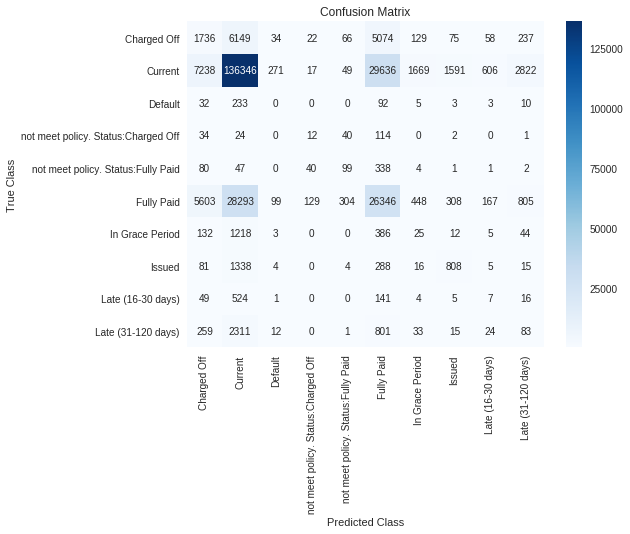

Decision tree - Imbalanced lean -One Sided Selection
0.8776531786305514


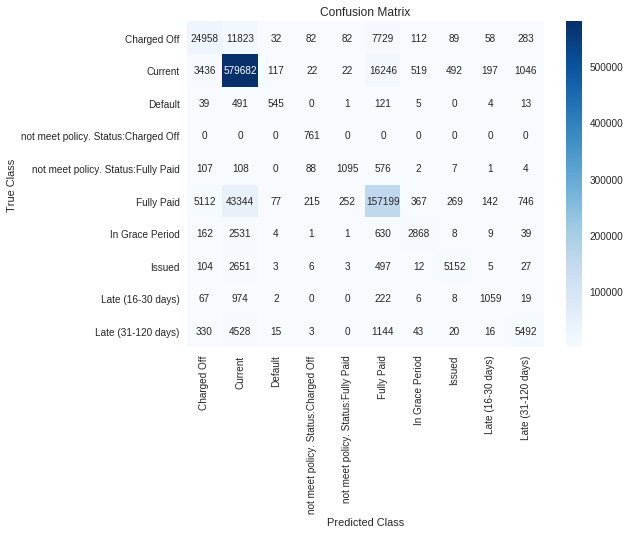

In [138]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print("Decision tree - Normal data set")
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
cm=(metrics.confusion_matrix(y_test, dt.predict(X_test)))
conf_m(cm)

dt = DecisionTreeClassifier()
dt.fit(X_resampled, y_resampled)
print("Decision tree - Imbalanced lean -One Sided Selection")
print(metrics.accuracy_score(y, dt.predict(X)))
cm=(metrics.confusion_matrix(y, dt.predict(X)))
conf_m(cm)


## Similarly, the accuracy of One-Sided Selection is higher than normal Random Forest model.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Random Forest - Normal data set
0.6894716280886806


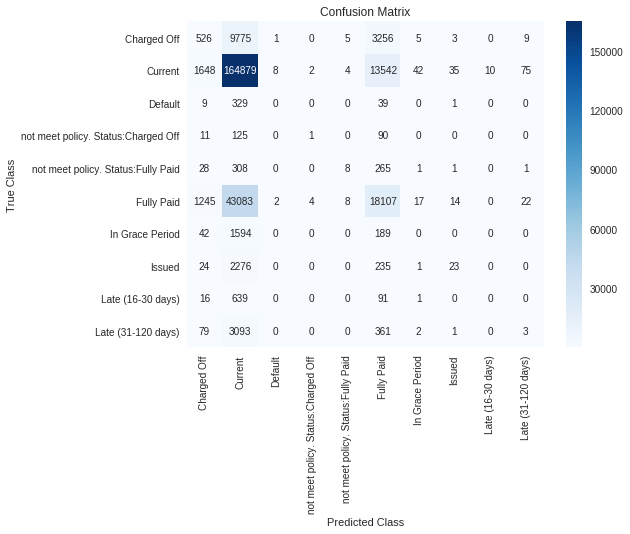

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Random Forest - Imbalanced learn - One-sided Selection
0.8606300126552465


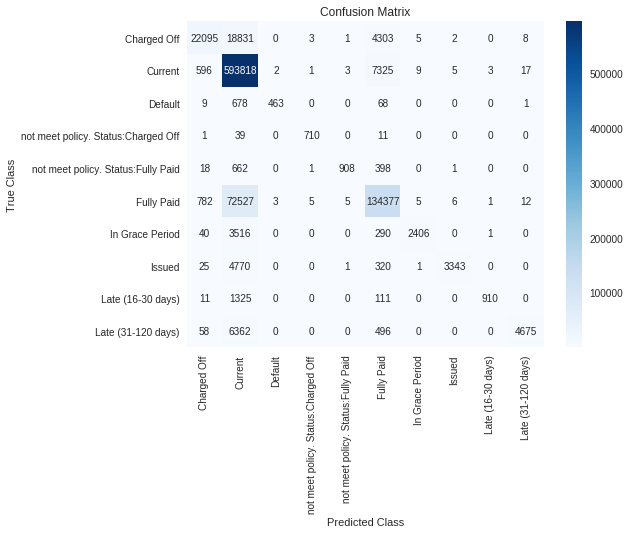

In [139]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print("Random Forest - Normal data set")
print(metrics.accuracy_score(y_test, clf.predict(X_test)))
cm=(metrics.confusion_matrix(y_test, clf.predict(X_test)))
conf_m(cm)
print("\n")
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)

print("Random Forest - Imbalanced learn - One-sided Selection")
print(metrics.accuracy_score(y, clf.predict(X)))
cm=(metrics.confusion_matrix(y, clf.predict(X)))
conf_m(cm)